In [198]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [164]:
df = pd.read_csv('KaggleV2-May-2016.csv')



In [168]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [169]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [170]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [172]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [173]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [174]:
df['AppointmentDay']=np.where((df['AppointmentDay']-df['ScheduledDay']).dt.days<0,df['AppointmentDay'],df['ScheduledDay'])

In [175]:
df=df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSreceived'})

In [176]:
df['Presence']=df['No-show'].apply(lambda x:'Present' if x=='No' else 'Absent')

Present    88208
Absent     22319
Name: Presence, dtype: int64

In [178]:
df=df.drop('No-show',axis=1)

In [78]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Presence
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Absent
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Absent
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Absent
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Absent
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Absent


In [179]:
df['Waiting-Time']=df['AppointmentDay']-df[ 'ScheduledDay']
df['Waiting-Time']=df['Waiting-Time'].dt.days

In [180]:
df['Weekdays']=df.AppointmentDay.dt.weekday

In [181]:
replace_m={'Weekdays':{0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}}

In [182]:
df.replace(replace_m,inplace=True)

In [183]:
df.Weekdays.value_counts()

Tuesday      26169
Wednesday    24260
Monday       23086
Friday       18915
Thursday     18073
Saturday        24
Name: Weekdays, dtype: int64

In [184]:
df['Month']=df.AppointmentDay.dt.month_name()

In [185]:
df['Hour']=df.AppointmentDay.dt.hour

In [186]:
# checking for null values

df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSreceived       0
Presence          0
Waiting-Time      0
Weekdays          0
Month             0
Hour              0
dtype: int64

In [187]:
### Finding unique values
print("Unique Values in 'Gender'", list(df.Gender.unique()))
print("Unique Values in 'Scholarship'", list(df.Scholarship.unique()))
print("Unique Values in 'Hypertension'", list(df.Hypertension.unique()))
print("Unique Values in 'Diabetes'", list(df.Diabetes.unique()))
print("Unique Values in 'Alcoholism'", list(df.Alcoholism.unique()))
print("Unique Values in 'Handicap'", list(df.Handicap.unique()))
print("Unique Values in 'SMSReceived'", list(df.SMSreceived.unique()))

Unique Values in 'Gender' ['F', 'M']
Unique Values in 'Scholarship' [0, 1]
Unique Values in 'Hypertension' [1, 0]
Unique Values in 'Diabetes' [0, 1]
Unique Values in 'Alcoholism' [0, 1]
Unique Values in 'Handicap' [0, 1, 2, 3, 4]
Unique Values in 'SMSReceived' [0, 1]


In [188]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Waiting-Time,Hour
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,-0.000090,0.0
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.019024,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.0
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.0


In [189]:
df.Gender.value_counts().F

71840

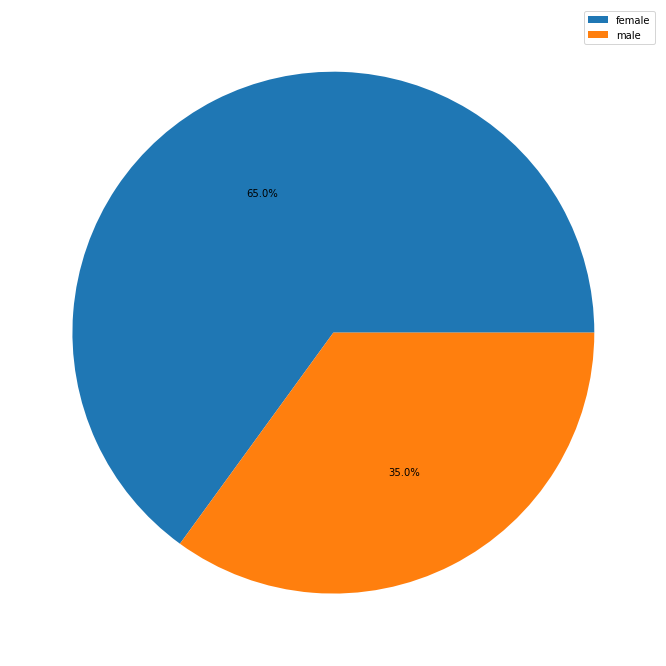

In [190]:
### finding the ratio of male to female patients
labels=['female','male']
fig, ax1=plt.subplots(figsize=(24,12))
ax1.pie(df.Gender.value_counts(),autopct='%.1f%%')
ax1.legend(labels)

In [191]:
df.Presence.value_counts()
lb=

Present    88208
Absent     22319
Name: Presence, dtype: int64

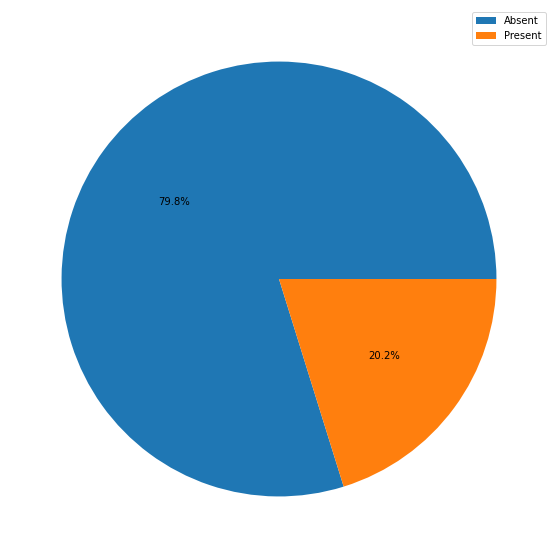

In [196]:
### finding ratio of present to absent  patients
fig,ax2=plt.subplots(figsize=(20,10))
ax2.pie(df.Presence.value_counts(),autopct='%.1f%%')
ax2.legend(['Absent','Present'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1a19bbfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1a19cb6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1a19bbc40>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1a19cbd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1a19d60a0>],
 'means': []}

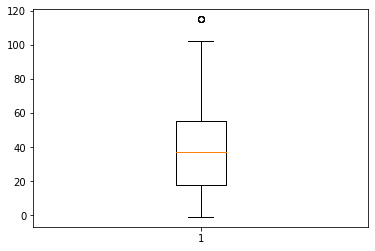

In [197]:
plt.boxplot(df.Age)

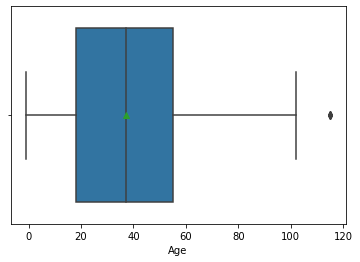

In [204]:
sns.boxplot(df.Age,showmeans=True)


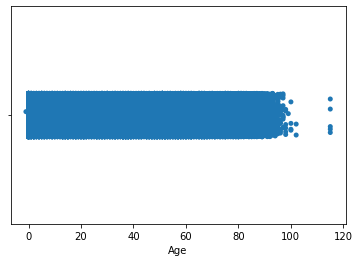

In [205]:
sns.stripplot(df.Age)

In [200]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [245]:
f=df.groupby('Gender')['Presence'].value_counts()['F']
m=df.groupby('Gender')['Presence'].value_counts()['M']


In [ ]:
### Gender wise comparision of attendance

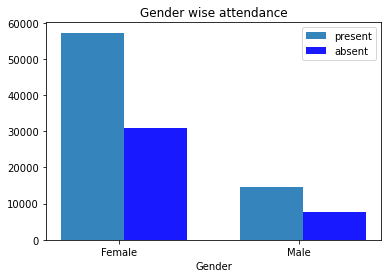

In [290]:
index=np.arange(2)
bar_width=0.35
opacity=0.9
fig=plt.subplots()

p1=plt.bar(index, f,bar_width,
alpha=opacity,
label='present')

plt.bar(index+bar_width, m,bar_width,
alpha=opacity,color='b',
label='absent')

plt.xlabel('Gender')
plt.title('Gender wise attendance')
plt.xticks(index + 0.15, ('Female','Male'))
plt.legend()







In [348]:
a=df.groupby('Weekdays').Presence.value_counts()

In [367]:
a

Weekdays   Presence
Friday     Present     15028
           Absent       3887
Monday     Present     18524
           Absent       4562
Saturday   Present        23
           Absent          1
Thursday   Present     14373
           Absent       3700
Tuesday    Present     20877
           Absent       5292
Wednesday  Present     19383
           Absent       4877
Name: Presence, dtype: int64

In [368]:
b=(a[1],a[3],a[5],a[7],a[9])

In [369]:
b

(3887, 4562, 1, 3700, 5292)

<BarContainer object of 5 artists>

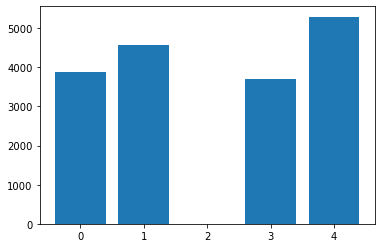

In [374]:
index=np.arange(5)
plt.bar(index,b)